In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
df = pd.read_csv('C:\\Users\\wajah\\Documents\\Python Projects\\Review Sentiment Analysis\\Dataset\\Data.csv')
print(df.head())

             id                                             review  \
0      Liseklbm  Sooooooo many bugs in multiplayer lol. Guys sh...   
1      lolnolol  Not worth your time or your money. Supposedly ...   
2  Differento4x  Not good honestly i played it 4 years ago and ...   
3       Pitipat  This game is suck it so hard and the zombie ar...   
4         Zyloc  They should make a movie and not a game.,I've ...   

  type_review       date language  views  votes  score  
0      normal   9/6/2020  English    0.0    0.0    0.0  
1    expanded  3/22/2021  English    0.0    0.0    0.0  
2    expanded  2/15/2021  English    0.0    0.0    0.0  
3    expanded   3/7/2021  English    0.0    0.0    1.0  
4    expanded  7/27/2020  English    0.0    0.0    1.0  


In [3]:
print(df.isnull().sum())

id             13
review         13
type_review    13
date           13
language       13
views          13
votes          13
score          13
dtype: int64


In [8]:
df = df.dropna()
print(df.isnull().sum())

id             0
review         0
type_review    0
date           0
language       0
views          0
votes          0
score          0
dtype: int64


In [9]:
import nltk
import re
from nltk.corpus import stopwords
import string

nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

df["review"] = df["review"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wajah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
ratings = df["score"].value_counts()
numbers = ratings.index
quantity = ratings.values

import plotly.express as px
figure = px.pie(df, 
             values=quantity, 
             names=numbers,hole = 0.5)
figure.show()

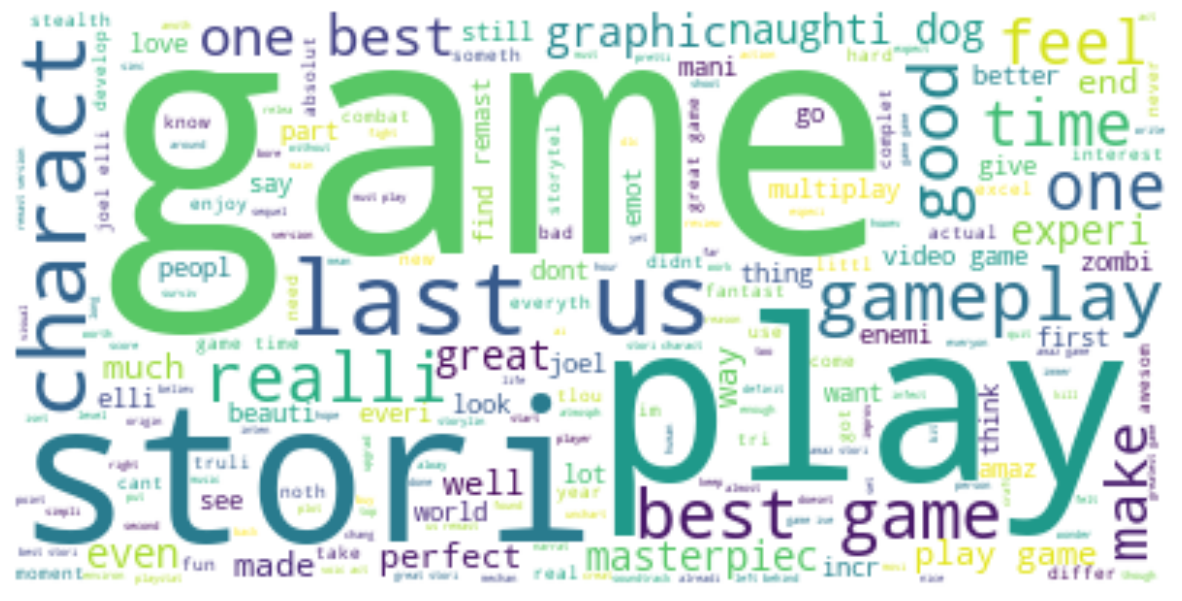

In [11]:
text = " ".join(i for i in df.review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [12]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["review"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["review"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["review"]]
df = df[["review", "Positive", "Negative", "Neutral"]]
print(df.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\wajah\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                              review  Positive  Negative  \
0  sooooooo mani bug multiplay lol guy shoot wall...     0.301     0.147   
1  worth time money suppo one play charact let pr...     0.430     0.085   
2       good honest play  year ago prefer play game      0.733     0.000   
3  game suck hard zombi much damag hit shot use l...     0.000     0.551   
4  make movi gameiv complet  game one worst ive e...     0.096     0.445   

   Neutral  
0    0.552  
1    0.485  
2    0.267  
3    0.449  
4    0.459  


In [13]:
x = sum(df["Positive"])
y = sum(df["Negative"])
z = sum(df["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [14]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  668.0649999999999
Negative:  145.26399999999992
Neutral:  1333.6979999999994
